# Try 2 - Model selection, XGBoost dataset top10

### This was our pick, the analysis is explained in a summary at the end of this notebook.

We created new csv-files that only contained the top columns in feature importance and the 'Saleprice'. We did three versions: top10, top12 and top15.

We decided to run each of the new csv-files through the same notebook in different copies to see how the number of columns we chose to keep impacted the R2-value.

This notebook will show the csv-file for top10.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('top10andprice.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,TotRmsAbvGrd,YearBuilt,LandContour,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,Saleprice
0,8,2003,Lvl,706,2,856,856,854,1710,7,208500
1,6,1976,Lvl,978,2,1262,1262,0,1262,6,181500
2,6,2001,Lvl,486,2,920,920,866,1786,7,223500
3,7,1915,Lvl,216,3,961,756,756,1717,7,140000
4,9,2000,Lvl,655,3,1145,1145,1053,2198,8,250000


## Encoding categorical data

We can see below, that only one column has categorical data and must be one hot encoded.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotRmsAbvGrd  1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   LandContour   1460 non-null   object
 3   BsmtFinSF1    1460 non-null   int64 
 4   GarageCars    1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   2ndFlrSF      1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
 9   OverallQual   1460 non-null   int64 
 10  Saleprice     1460 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 125.6+ KB


### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,TotRmsAbvGrd,YearBuilt,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,8,2003,706,2,856,856,854,1710,7,0,0,0,1
1,6,1976,978,2,1262,1262,0,1262,6,0,0,0,1
2,6,2001,486,2,920,920,866,1786,7,0,0,0,1
3,7,1915,216,3,961,756,756,1717,7,0,0,0,1
4,9,2000,655,3,1145,1145,1053,2198,8,0,0,0,1
5,5,1993,732,2,796,796,566,1362,5,0,0,0,1
6,7,2004,1369,2,1694,1686,0,1694,8,0,0,0,1
7,7,1973,859,2,1107,1107,983,2090,7,0,0,0,1
8,8,1931,0,2,1022,952,752,1774,7,0,0,0,1
9,5,1939,851,1,1077,991,0,1077,5,0,0,0,1


In [5]:
X = X.values
y = y.values

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [7]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[268616.91 200624.  ]
 [134145.41 133000.  ]
 [115241.47 110000.  ]
 [224192.3  192000.  ]
 [ 84624.42  88000.  ]
 [114255.57  85000.  ]
 [273759.91 282922.  ]
 [120748.48 141000.  ]
 [647299.62 745000.  ]
 [151545.2  148800.  ]
 [207496.84 208900.  ]
 [149168.36 136905.  ]
 [225470.17 225000.  ]
 [129125.52 123000.  ]
 [143378.91 119200.  ]
 [150941.78 145000.  ]
 [207925.55 190000.  ]
 [116103.92 123600.  ]
 [129082.12 149350.  ]
 [188426.08 155000.  ]
 [136327.08 166000.  ]
 [145646.66 144500.  ]
 [104045.16 110000.  ]
 [170363.91 174000.  ]
 [171670.39 185000.  ]
 [146942.5  168000.  ]
 [180437.31 177500.  ]
 [ 74575.54  84500.  ]
 [361920.38 320000.  ]
 [121242.62 118500.  ]
 [124880.2  110000.  ]
 [187729.48 213000.  ]
 [141876.33 156000.  ]
 [290945.88 250000.  ]
 [256832.98 372500.  ]
 [171180.47 175000.  ]
 [285192.47 277500.  ]
 [138615.77 112500.  ]
 [216736.06 263000.  ]
 [281292.03 325000.  ]
 [257299.08 243000.  ]
 [136754.2  130000.  ]
 [180403.56 164990.  ]
 [263293.62

## Evaluating the Model Performance

In [9]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8797663434499159


### Analysis of the best number of top features

The R2 value:<br><br>

Top 15  --- 0.8772459102377688 -> 0.877 

Top 12  --- 0.8728539932453862 -> 0.873 

Top 10  --- 0.8797663434499159 -> 0.880 

Top 7   --- 0.8629247966353095 -> 0.863 

Top 5   --- 0.8243776040452636 -> 0.824

With the bar plot below, we came to the conclusion that the top 10 features seems to be a good pick.

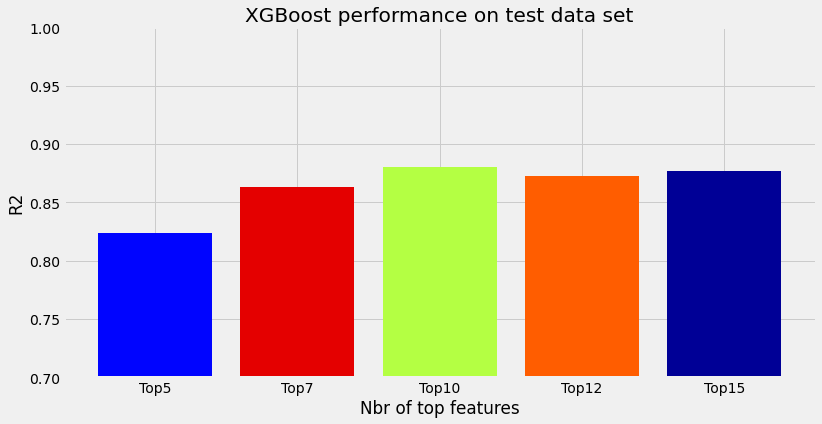

In [10]:
import matplotlib.cm as cm
from numpy.random import rand

models = np.array(["Top5", "Top7", "Top10", "Top12", "Top15"])
results_r2 = [ 0.824, 0.863, 0.880, 0.873, 0.877 ]

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))
plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Nbr of top features")
plt.ylabel("R2")
plt.title("XGBoost performance on test data set")
plt.ylim(0.7, 1)
plt.show()